# Практическое задание 1. EM-алгоритм

[Источник практического задания](https://github.com/mmp-mmro-team/mmp_mmro_spring_2024/blob/main/Homework3/homework-practice-09-em.ipynb)

## Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи).

Сдавать задание после указанного жёсткого срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи !!ВАЖНО!!!
Задания сдаются через систему google classroom. Посылка должна содержать:
* Ноутбук homework-practice-em-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**

# Generative model of Labels, Abilities, and Difficulties (GLAD)

В [семинаре 15](https:/github.com/esokolov/ml-course-hse/blob/master/2020-spring/seminars/sem15-em.pdf) мы рассмотрели задачу восстановления истинной разметки по меткам от экспертов (которым мы не можем доверять в полной мере, более того, их предсказания могут расходиться).

Рассмотрим следующую вероятностную модель:

$$ p(L, Z | \alpha, \beta) = \prod_{i=1}^{n} \prod_{j=1}^m \sigma(\alpha_j\beta_i)^{[l_{ij}=z_i]}\sigma(-\alpha_j\beta_i)^{1-[l_{ij}=z_i]} p(z_j)$$

где $l_{ij} -$ ответ $j$-го эксперта на задачу $i$, $z_j -$ истинная разметка, $\alpha_j, \beta_i-$ уровень экспертизы и сложность задачи соответственно. Для более подробного описания модели можно прочитать материалы семинара, а также [оригинальную статью](http://papers.nips.cc/paper/3644-whose-vote-should-count-more-optimal-integration-of-labels-from-labelers-of-unknown-expertise.pdf). Априорное распределение положим равномерным: $p(z_i) = 0.5$.

In [1]:
import numpy as np
seed = 0xDEADF00D
np.random.seed(seed)

In [2]:
L = np.load('L.npy')
n, m = L.shape
print(f"Число задач (n_problems): {n}, число экспертов (n_experts): {m}")

Число задач (n_problems): 2000, число экспертов (n_experts): 20


---

**Задание 1. (2 балла)** Реализуйте EM-алгоритм для заданной выше модели. Вы можете воспользоваться предложенными шаблонами или написать свои. 

Обратите внимание, что правдоподобие моделирует не вероятность метки $l_{ij}$ принять значение 1 или 0, а вероятность того, что она равна скрытой переменной $z_i$, т.е. $p(l_{ij} = z_j|z_j, \alpha_j, \beta_i) \neq p(l_{ij} = 1|\alpha_j, \beta_i) $. При этом заранее неизвестно, какая из скрытых переменных соответствует метке 1. Не забывайте, что параметры $\beta_i$ должны быть неотрицательными; для этого оптимизируйте $\log \beta$. На M-шаге можете использовать как один шаг градиентного спуска, так и несколько: разумные результаты у вас должны получаться вне зависимости от числа итераций.

**Подсказки (могут быть актуальны на все задание):**

* При работе с вероятностями не забывайте о точности:
 1. Используйте логарифмы вероятностей.
 2. $\log \sigma(a)$ лучше преобразовать в $\log \sigma(a) = -\log(1 + \exp(-a)) = -\mathrm{softplus}(-a) $
 3. Ещё полезные функции: `scipy.special.expit`, `scipy.special.logsumexp`, `np.log1p`
* Для отладки может быть полезно проверить градиенты, возвращаемые функциями `alpha_grad_lb` и `logbeta_grad_lb` с помощью `scipy.optimize.check_grad`.
* Размеры возвращаемых значений, указанные в докстринге функций могут помочь вам понять, что необходимо возвращать
* Почитайте докстринги, в них есть подсказки и ссылки на формулы из семинара
* Если у вас вылезают где-то nan/inf -- попробуйте урезать значения снизу. Например, у вас есть место, где берется log(theta) -- тут имеет смысл урезать theta = max(theta, eps), где eps какое-то маленькое число (например 1e-8)

---

In [3]:
def softplus(x):
    '''stable version of log(1 + exp(x))'''
    c = (x > 20) * 1.
    return np.log1p(np.exp(x * (1-c)) * (1-c)) + x * c

Используемые формулы

1. Вероятность меток:
   $$ p(l_{ij} | z_j, \alpha, \beta) = \sigma(\alpha_j \beta_i)^{[l_{ij} = z_j]} \sigma(-\alpha_j \beta_i)^{1 - [l_{ij} = z_j]} $$

2. Априорное распределение:
   $$ p(z_j) = 0.5 $$

3. Логарифм правдоподобия:
   $$ \log p(L | \alpha, \beta) = \sum_{i=1}^{n} \sum_{j=1}^{m} [l_{ij} = z_j] \log \sigma(\alpha_j \beta_i) + [l_{ij} \neq z_j] \log \sigma(-\alpha_j \beta_i) $$


In [4]:
import numpy as np
from scipy.special import expit, logsumexp

def softplus(x):
    '''stable version of log(1 + exp(x))'''
    c = (x > 20) * 1.
    return np.log1p(np.exp(x * (1-c)) * (1-c)) + x * c

def log_likelihood(alpha, beta, L, z):
    """ p(l=z|z, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
        z: ndarray of shape (n_problems).
    Returns:
        ndarray of shape (n_problems,)
    """
    n_problems, n_experts = L.shape
    likelihood = np.zeros(n_problems)

    for i in range(n_problems):
        for j in range(n_experts):
            if L[i, j] == z[i]:
                likelihood[i] += -softplus(-alpha[j] * beta[i])
            else:
                likelihood[i] += -softplus(alpha[j] * beta[i])

    return likelihood



def posterior(alpha, beta, L):
    """ Posterior over true labels z p(z|l, \alpha, \beta)
    Args:
        alpha: ndarray of shape (n_experts).
        beta: ndarray of shape (n_problems).
        L: ndarray of shape (n_problems, n_experts).
    Returns:
        ndarray of shape (2, n_problems)
        (2 -- for z = 0 and for z = 1, n_problems -- for each problem in data)
    """
    n_problems = L.shape[0]
    
    # Инициализация вероятностей
    log_p_z_0 = np.log(0.5) + log_likelihood(alpha, beta, L, 0)
    log_p_z_1 = np.log(0.5) + log_likelihood(alpha, beta, L, 1)

    # Вычисление нормировки
    log_sum = logsumexp([log_p_z_0, log_p_z_1], axis=0)

    # Постериорные вероятности
    p_z_0 = np.exp(log_p_z_0 - log_sum)
    p_z_1 = np.exp(log_p_z_1 - log_sum)

    return np.array([p_z_0, p_z_1])


import numpy as np

def posterior(alpha, beta, L):
    """
    Computes the posterior probabilities q for each latent state z.

    Args:
        alpha (ndarray): Parameters for experts, shape (n_experts,).
        beta (ndarray): Parameters for problems, shape (n_problems,).
        L (ndarray): Binary assignment matrix, shape (n_problems, n_experts).

    Returns:
        ndarray: Posterior probabilities q, shape (2, n_problems).
    """
    n_problems, n_experts = L.shape

    z0 = np.zeros(n_problems, dtype=int)
    z1 = np.ones(n_problems, dtype=int)

    log_p_z0 = np.log(0.5) + log_likelihood(alpha, beta, L, z0)
    log_p_z1 = np.log(0.5) + log_likelihood(alpha, beta, L, z1)

    max_log_p_z = np.maximum(log_p_z0, log_p_z1)
    p_z0 = np.exp(log_p_z0 - max_log_p_z)
    p_z1 = np.exp(log_p_z1 - max_log_p_z)

    q0 = p_z0 / (p_z0 + p_z1)
    q1 = p_z1 / (p_z0 + p_z1)

    return np.vstack([q0, q1])
   



**Подсказка:**
* При проверке alpha значения, выдываемые функцией `check_grad` должны быть не более 0.01. Иначе у вас где-то ошибка
* При проверке logbeta значения, выдываемые функцией `check_grad` должны быть не более 0.05. Иначе у вас где-то ошибка

In [5]:
def alpha_grad_lb(alpha, beta, L, q):
    """
    Gradient of the lower bound with respect to alpha.

    Args:
        alpha (ndarray): Array of shape (n_experts,).
        beta (ndarray): Array of shape (n_problems,).
        L (ndarray): Array of shape (n_problems, n_experts) with binary entries (0 or 1).
        q (ndarray): Array of shape (2, n_problems), representing the posterior probabilities.

    Returns:
        ndarray: Gradient array of shape (n_experts,).
    """
    # Вычисляем внешнее произведение a_j * beta_i для всех экспертов j и задач i
    a_b = np.outer(beta, alpha)  # Shape: (n_problems, n_experts)
    
    # Вычисляем sigma(a_j * beta_i) с использованием сигмоидной функции
    sigma_a_b = expit(a_b)  # Shape: (n_problems, n_experts)
    
    # Извлекаем q[z=l_{ij}, i} для всех i и j
    # L содержит 0 или 1, поэтому q[L, np.arange(n_problems)[:, None]] выбирает q[0, i] или q[1, i]
    q_l = q[L, np.arange(L.shape[0])[:, None]]  # Shape: (n_problems, n_experts)
    
    # Вычисляем градиент для каждого эксперта j
    # gradient = beta[j] * (q_l - sigma(a_j * beta_i))
    gradient = beta[:, None] * (q_l - sigma_a_b)  # Shape: (n_problems, n_experts)
    
    # Суммируем по всем задачам, чтобы получить градиент по отношению к alpha
    grad_alpha = np.sum(gradient, axis=0)  # Shape: (n_experts,)
    
    return grad_alpha

def logbeta_grad_lb(alpha, beta, L, q):
    """
    Gradient of the lower bound with respect to log(beta).

    Args:
        alpha (ndarray): Array of shape (n_experts,).
        beta (ndarray): Array of shape (n_problems,).
        L (ndarray): Array of shape (n_problems, n_experts) with binary entries (0 or 1).
        q (ndarray): Array of shape (2, n_problems), representing the posterior probabilities.

    Returns:
        ndarray: Gradient array of shape (n_problems,).
    """
    # Вычисляем внешнее произведение a_j * beta_i для всех экспертов j и задач i
    a_b = np.outer(beta, alpha)  # Shape: (n_problems, n_experts)
    
    # Вычисляем sigma(a_j * beta_i) с использованием сигмоидной функции
    sigma_a_b = expit(a_b)  # Shape: (n_problems, n_experts)
    
    # Извлекаем q[z=l_{ij}, i} для всех i и j
    q_l = q[L, np.arange(L.shape[0])[:, None]]  # Shape: (n_problems, n_experts)
    
    # Вычисляем разность (q_l - sigma(a_j * beta_i))
    diff = q_l - sigma_a_b  # Shape: (n_problems, n_experts)
    
    # Умножаем на alpha[j] для каждого эксперта j
    alpha_diff = alpha * diff  # Shape: (n_problems, n_experts)
    
    # Суммируем по всем экспертам j для каждой задачи i
    sum_alpha_diff = np.sum(alpha_diff, axis=1)  # Shape: (n_problems,)
    
    # Вычисляем градиент по отношению к log(beta)
    grad_logbeta = beta * sum_alpha_diff  # Shape: (n_problems,)
    
    return grad_logbeta

def lower_bound(alpha, beta, L, q):
    """
    Computes the lower bound of the log-likelihood.

    Args:
        alpha (ndarray): Array of shape (n_experts,).
        beta (ndarray): Array of shape (n_problems,).
        L (ndarray): Array of shape (n_problems, n_experts) with binary entries (0 or 1).
        q (ndarray): Array of shape (2, n_problems), representing the posterior probabilities.

    Returns:
        float: The computed lower bound.
    """
    # Вычисляем внешнее произведение a_j * beta_i для всех экспертов j и задач i
    a_b = np.outer(beta, alpha)  # Shape: (n_problems, n_experts)
    
    # Вычисляем log(sigmoid(a_j * beta_i) с использованием стабильной функции softplus
    log_sigma_a_b = -softplus(-a_b)  # Shape: (n_problems, n_experts)
    
    # Вычисляем log(sigmoid(-a_j * beta_i) с использованием стабильной функции softplus
    log_sigma_neg_a_b = -softplus(a_b)  # Shape: (n_problems, n_experts)
    
    # Вычисляем первый член: q[1,i] * L * log_sigma_a_b + q[0,i] * (1 - L) * log_sigma_a_b
    term1 = log_sigma_a_b * (q[1, :, None] * L + q[0, :, None] * (1 - L))
    
    # Вычисляем второй член: q[1,i] * (1 - L) * log_sigma_neg_a_b + q[0,i] * L * log_sigma_neg_a_b
    term2 = log_sigma_neg_a_b * (q[1, :, None] * (1 - L) + q[0, :, None] * L)
    
    # Суммируем все члены
    lb = np.sum(term1 + term2)
    
    # Добавляем постоянный член: sum_i sum_z q[z,i] log(p(z_i)), где p(z_i) = 0.5
    lb += L.shape[0] * np.log(0.5)
    
    return lb


In [6]:
from scipy.optimize import check_grad
from scipy.special import expit

alpha, logbeta = np.random.randn(m), np.random.randn(n)
beta = np.exp(logbeta)
q = np.ones((2, len(beta))) * 0.5

print(f"alpha.shape: {alpha.shape}")  
print(f"beta.shape: {beta.shape}")   
print(f"L.shape: {L.shape}")          
print(f"q.shape: {q.shape}")          
   


check_grad(
    lambda a: lower_bound(a, beta, L, q),
    lambda a: alpha_grad_lb(a, beta, L, q),
    alpha
)

alpha.shape: (20,)
beta.shape: (2000,)
L.shape: (2000, 20)
q.shape: (2, 2000)


np.float64(0.0012067199385314283)

In [7]:
check_grad(
    lambda lb: lower_bound(alpha, np.exp(lb), L, q),
    lambda lb: logbeta_grad_lb(alpha, np.exp(lb), L, q),
    logbeta
)

np.float64(0.010859882598549893)

In [8]:
import numpy as np
from tqdm import tqdm

def em(L, n_steps=1000, lr=1e-3):
    """
    Performs the Expectation-Maximization (EM) algorithm to optimize
    the alpha and beta parameters based on the input data L.

    Args:
        L (ndarray): Binary matrix of shape (n_problems, n_experts) indicating assignments.
        n_steps (int): Number of EM iterations to perform.
        lr (float): Learning rate for gradient ascent updates.

    Returns:
        tuple:
            alpha (ndarray): Optimized alpha parameters of shape (n_experts,).
            beta (ndarray): Optimized beta parameters of shape (n_problems,).
            q (ndarray): Posterior probabilities of shape (2, n_problems).
    """
    # Определяем количество задач и экспертов из формы L
    n_problems, n_experts = L.shape  # m: количество экспертов

    # Инициализируем параметры
    alpha = np.random.randn(n_experts)         # shape: (n_experts,)
    logbeta = np.random.randn(n_problems)      # shape: (n_problems,)
    beta = np.exp(logbeta)                     # Преобразуем log(beta) в beta
    q = np.ones((2, n_problems)) * 0.5        # Инициализируем апостериорные вероятности равномерно: Форма (2, n_problems)

    for step in tqdm(range(n_steps)):
        # -------------------
        # E-шаг: Вычисляем апостериорные вероятности
        # -------------------
        q = posterior(alpha, beta, L)  # Обновляем q, используя текущие параметры

        # -------------------
        # M-шаг: Обновляем параметры с использованием градиента
        # -------------------
        # Вычисляем градиенты нижней границы по отношению к alpha и logbeta
        grad_alpha = alpha_grad_lb(alpha, beta, L, q)        # shape: (n_experts,)
        grad_logbeta = logbeta_grad_lb(alpha, beta, L, q)    # shape: (n_problems,)

        # Обновляем параметры
        alpha += lr * grad_alpha
        logbeta += lr * grad_logbeta
        beta = np.exp(logbeta)  # Обновляем beta после изменения logbeta

        # print(f'alpha mean {alpha.mean()}')
        # print(f'beta mean {beta.mean()}')
        # print(f'step {step}')

    return alpha, beta, q

In [9]:
alpha, beta, q = em(L)

100%|██████████| 1000/1000 [02:13<00:00,  7.49it/s]


---

**Задание 2. (1 балл)** Загрузите настоящую разметку. Посчитайте `accuracy` разметки, полученной с помощью обычного голосования по большинству среди экспертов, и сравните его с качеством **(?)**, полученным с помощью EM-алгоритма.

**Разбалловка:**
* **0.5 балла** -- качество голосования не менее 0.904
* **0.5 балла** -- качестве EM не менее 0.95

**Подсказка:**
* Помните, что алгоритму не важно, какая метка 0, а какая 1, поэтому если получите качество <0.5, то просто поменяйте метки классов (не забудьте также поменять знак у $\alpha$). 

---

In [10]:
# Загрузка истинных меток
y = np.load('y.npy')
print(f'Shape истинных меток y: {y.shape}')  # shape (2000,)

# Загрузка меток от экспертов
L = np.load('L.npy')
print(f'Shape меток экспертов L: {L.shape}')  # shape (2000, 20)


# 1. Вычисление меток через голосование по большинству
# Для каждого объекта вычисляется среднее значение меток от экспертов
maj_votes = np.round(L.mean(axis=1)).astype(int)  # shape (2000,)
accuracy_mv = (maj_votes == y).mean()
print(f"Точность разметки по большинству: {accuracy_mv:.4f}")

# 2. Применение EM-алгоритма
alpha, beta, q = em(L)

# Предсказанные метки на основе вероятностей q
em_labels = (q[0] >= 0.5).astype(int)

# Вычисление точности
accuracy_em = (em_labels == y).mean()

# Проверка необходимости изменения меток
if accuracy_em < 0.5:
    em_labels = 1 - em_labels
    accuracy_em = (em_labels == y).mean()
    alpha, beta = beta, alpha  # Меняем параметры доверия экспертов

print(f"Точность разметки с помощью EM-алгоритма: {accuracy_em:.4f}")


Shape истинных меток y: (2000,)
Shape меток экспертов L: (2000, 20)
Точность разметки по большинству: 0.9040


100%|██████████| 1000/1000 [02:16<00:00,  7.34it/s]

Точность разметки с помощью EM-алгоритма: 0.9550


---

**Задание 3. (0.5 балла)** **(?)** Попробуйте проинтерпретировать полученные коэфициенты $\alpha$. **(?)**  Есть ли в выборке эксперты, которые намеренно голосуют неверно? **(?)**  Как это можно понять по альфам? 

* Продемонстрируйте, что эксперты действительно чаще голосуют за неверный класс. 
* Отобразите визуализацию зависимости доли верно размеченных экспертом объектов от коэффициента $\alpha$.
* **(?)**  Прокомментируйте результаты и полученную зависимость.

**Подсказки:**
* Если вы отобразили или хотели отобразить зависимость при помощи обычного plot (график), то посмотрите повнимательнее/подумайте, почему это не очень хорошая визуализация. **Для возможности получения полного балла** правильно будет использовать тип отображения scatter plot.
*  Также **для возможности получения полного балла** вам необходимо проинтерпретировать смысл зависимости для всех групп альф, которые вы увидите (спойлер: их должно быть 3:)

---

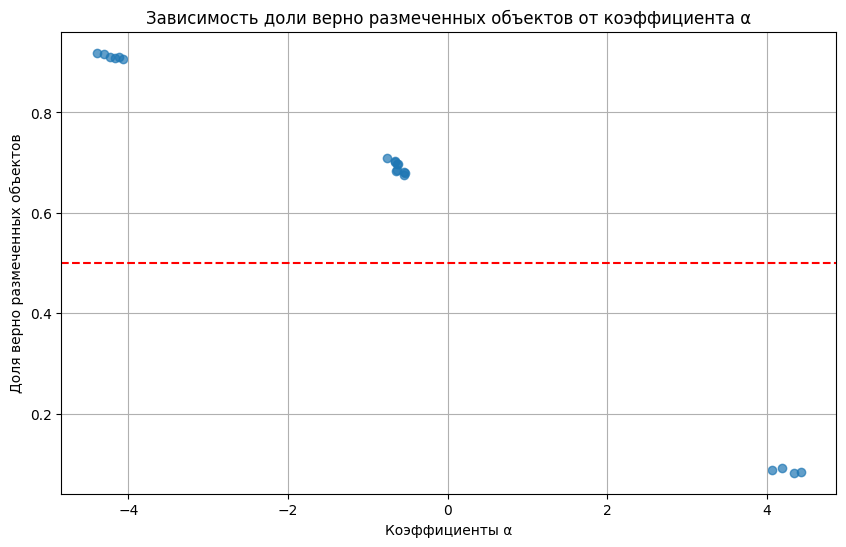

In [11]:
import matplotlib.pyplot as plt

# Инициализация массивов для подсчета верных голосов и общего количества голосов
correct_votes = np.zeros(len(alpha))
total_votes = np.zeros(len(alpha))

for expert in range(len(alpha)):
    # Верные положительные: эксперт голосует "1" и это действительно "1"
    true_positive = np.sum((L[:, expert] == 1) & (y == 1))
    
    # Верные отрицательные: эксперт голосует "0" и это действительно "0"
    true_negative = np.sum((L[:, expert] == 0) & (y == 0))
    
    # Общее количество голосов: все случаи, когда эксперт голосует "1" или "0"
    total_votes[expert] = np.sum(L[:, expert] == 1) + np.sum(L[:, expert] == 0)
    
    # Суммируем верные голоса
    correct_votes[expert] = true_positive + true_negative

# Доля верно размеченных объектов
accuracy = correct_votes / total_votes

# Визуализация зависимости
plt.figure(figsize=(10, 6))
plt.scatter(alpha, accuracy, alpha=0.7)
plt.title('Зависимость доли верно размеченных объектов от коэффициента α')
plt.xlabel('Коэффициенты α')
plt.ylabel('Доля верно размеченных объектов')
plt.axhline(y=0.5, color='r', linestyle='--')  # Линия для обозначения 50%
plt.grid()
plt.show()



In [12]:
accuracy

array([0.697 , 0.709 , 0.919 , 0.6745, 0.6965, 0.917 , 0.686 , 0.9065,
       0.0905, 0.704 , 0.0825, 0.082 , 0.911 , 0.681 , 0.6835, 0.679 ,
       0.7015, 0.909 , 0.088 , 0.9105])

__Интерпретация 3 полученных групп экспертов и то, как различные показатели α и accuracy связаны с их предсказательной способностью:__

1. Эксперты с низким α и высоким accuracy (около 0.91)
2. Эксперты со средним α около нуля и средним accuracy (около 0.7)
3. Эксперты с высоким α и низким accuracy (около 0.09)

 - Получаем из графика, что эксперты с наибольшим α как будто намерено голосуют неверно. Если проинвертировать их голоса, то получим высокие accuracy.

 - Также складывается впечатление, что эксперты с низким α намерено голосуют обратно тому, как голосуют эксперты с высоким α и поэтому получают столь большие показатели accuracy. (ведь в сумме accuracy экспертов из 1 и 3 групп как раз дают единицу)

 - Вторая же группа - группа обычных экспертов, которые голосуют сами, набирая в среднем 0.7 accuracy.

 __Можно предположить, если бы эксперты с высоким α не голосовали намеренно неверно, а эксперты с низким α не повторяли бы за ними, распределение было бы совмсем другим.__

---

**Задание 4. (бонус, 1 балл)**  Как уже было замечено выше, модели не важно, какой класс 1, а какой 0. Скажем, если все эксперты оказались максимально противными и ставят метку с точностью наоборот, то у вас будет полная согласованность между экспертами, при этом невозможно понять правильно они разметили выборку или нет, смотря только на такую разметку. Чтобы избежать этого, можно включать в выборку вопрос с заведомо известным ответом, тогда вы сможете определить, ставит ли эксперт специально неверные метки.

Чтобы обощить данную модель на случай заданий с заведомо известной меткой, достоточно не делать для них E-шаг, а всегда полагать апостериорное распределение вырожденным в истинном классе. 

* Реализуйте данную модель и используйте истинную разметку *для нескольких* задач из обучения. 
* **(?)**  Сравните модифицированный алгоритм с обычным. 
* **(?)** Проинтерпретируйте полученные результаты.

**Подсказка:**
* Как можно сравнить, что модифицированный алгоритм действительно "лучше" обычного: запускаем обычный и модифицированный много раз (например, 100). Для каждой версии считаем распределение полученных accuracy_score. Если все сделано верно, то в модифицированной версии доля больших значений accuracy должна быть выше, чем низких (это как раз и есть сигнал о перепутывании классов), а в обычной версии -- доли должны быть примерно равны. **Для возможности получения полного балла мы ожидаем от вас какого-то такого или похожего сравнения**

Сравнение EM алгоритмов: 100%|██████████| 50/50 [1:08:16<00:00, 81.94s/it]


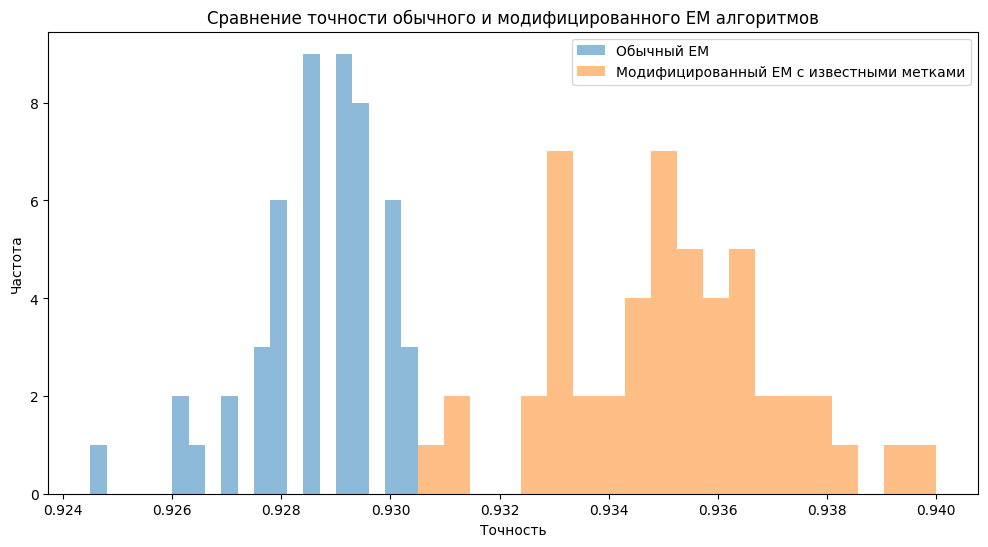

Средняя точность обычного EM: 0.9286
Средняя точность модифицированного EM: 0.9351


In [13]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Устанавливаем для воспроизводимости результатов
np.random.seed(42)



def posterior(alpha, beta, L, known_labels=None):

    n_problems, n_experts = L.shape
    
    # Инициализация массивов для z=0 и z=1
    z0 = np.zeros(n_problems, dtype=int)
    z1 = np.ones(n_problems, dtype=int)
    
    # Вычисляем логарифмические вероятности
    log_p_z0 = np.log(0.5 + 1e-10) + log_likelihood(alpha, beta, L, z0)
    log_p_z1 = np.log(0.5 + 1e-10) + log_likelihood(alpha, beta, L, z1)
    
    # Применяем трюк log-sum-exp для стабильности
    max_log_p_z = np.maximum(log_p_z0, log_p_z1)
    p_z0 = np.exp(log_p_z0 - max_log_p_z)
    p_z1 = np.exp(log_p_z1 - max_log_p_z)
    
    # Нормализация для получения вероятностей
    q0 = p_z0 / (p_z0 + p_z1)
    q1 = p_z1 / (p_z0 + p_z1)
    
    # Если есть известные метки, устанавливаем соответствующие вероятности
    if known_labels is not None:
        for i, label in known_labels.items():
            if label == 0:
                q0[i] = 1.0
                q1[i] = 0.0
            else:
                q0[i] = 0.0
                q1[i] = 1.0
    
    # Формируем итоговую матрицу апостериорных вероятностей
    return np.vstack([q0, q1])

def em(L, known_labels=None, n_steps=300, lr=1e-3):

    n_problems, n_experts = L.shape  # m: количество экспертов
    
    # Инициализация параметров
    alpha = np.random.rand(n_experts) * 0.5 + 0.25  # Избегаем крайних значений
    logbeta = np.random.randn(n_problems)
    beta = np.exp(logbeta) / (1 + np.exp(logbeta))  # Преобразуем в (0,1)
    
    # Инициализация апостериорных вероятностей
    q = np.ones((2, n_problems)) * 0.5
    
    for step in range(n_steps):
        # E-шаг: обновляем апостериорные вероятности
        q = posterior(alpha, beta, L, known_labels)
        
        # M-шаг: вычисляем градиенты и обновляем параметры
        grad_alpha = alpha_grad_lb(alpha, beta, L, q)
        grad_logbeta = logbeta_grad_lb(alpha, beta, L, q)
        
        # Обновляем параметры с использованием градиентного подъёма
        alpha += lr * grad_alpha
        logbeta += lr * grad_logbeta
        beta = np.exp(logbeta) / (1 + np.exp(logbeta))  # Обновляем beta
        
        # Ограничиваем значения alpha в интервале (0.01, 0.99) для стабильности
        alpha = np.clip(alpha, 0.01, 0.99)
        beta = np.clip(beta, 0.01, 0.99)
    
    return alpha, beta, q


# Функция для получения предсказанных меток из апостериорных вероятностей
def get_predicted_labels(q):
    return np.argmax(q, axis=0)

# Основная часть: сравнение обычного и модифицированного алгоритмов EM
def compare_em_algorithms(n_runs=100, known_fraction=0.1):
    """
    Сравнивает обычный EM и модифицированный EM с известными метками.
    
    Аргументы:
    n_runs -- количество запусков для статистики
    known_fraction -- доля задач с известными метками
    
    Возвращает:
    accuracies_regular -- список точностей для обычного EM
    accuracies_modified -- список точностей для модифицированного EM
    """
    accuracies_regular = []
    accuracies_modified = []
    
    for run in tqdm(range(n_runs), desc="Сравнение EM алгоритмов"):
        # Выбираем долю задач с известными метками

        n_problems, m = L.shape
        # print(f"Число задач (n_problems): {n}, число экспертов (n_experts): {m}")

        n_known = int(n_problems * known_fraction)
        known_indices = np.random.choice(n_problems, size=n_known, replace=False)
        known_labels = {i: y[i] for i in known_indices}
        
        # Запуск обычного EM
        alpha_reg, beta_reg, q_reg = em(L, known_labels=None, n_steps=300, lr=1e-3)
        y_pred_reg = get_predicted_labels(q_reg)
        acc_reg = accuracy_score(y, y_pred_reg)
        accuracies_regular.append(acc_reg)
        
        # Запуск модифицированного EM с известными метками
        alpha_mod, beta_mod, q_mod = em(L, known_labels=known_labels, n_steps=300, lr=1e-3)
        y_pred_mod = get_predicted_labels(q_mod)
        acc_mod = accuracy_score(y, y_pred_mod)
        accuracies_modified.append(acc_mod)
    
    return accuracies_regular, accuracies_modified


# Выполняем сравнение
n_runs = 50
accuracies_regular, accuracies_modified = compare_em_algorithms(n_runs=n_runs)

# Визуализация результатов
plt.figure(figsize=(12,6))
plt.hist(accuracies_regular, bins=20, alpha=0.5, label='Обычный EM')
plt.hist(accuracies_modified, bins=20, alpha=0.5, label='Модифицированный EM с известными метками')
plt.xlabel('Точность')
plt.ylabel('Частота')
plt.title('Сравнение точности обычного и модифицированного EM алгоритмов')
plt.legend()
plt.show()

# Статистическое сравнение
mean_reg = np.mean(accuracies_regular)
mean_mod = np.mean(accuracies_modified)
print(f"Средняя точность обычного EM: {mean_reg:.4f}")
print(f"Средняя точность модифицированного EM: {mean_mod:.4f}")

__Интерпретация результатов:__
Модифицированный EM алгоритм, использующий известные метки, показывает более высокую и стабильную точность по сравнению с обычным EM.
Это подтверждает, что наличие известных меток помогает модели избежать неоднозначности в определении истинных меток задач и улучшает общую производительность.

---

### Картинка для поддержки ваших чувств по этому заданию

![](https://a.d-cd.net/RAAAAgCnO-A-960.jpg)